### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

import warnings; warnings.simplefilter('ignore')

### Load Dataset

In [2]:
apps = pd.read_csv('apps.tsv', delimiter='\t',encoding='utf-8')
print ('shape of apps data - {}'.format(apps.shape))
apps.head()

shape of apps data - (1603111, 5)


,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [3]:
user_history = pd.read_csv('user_history.tsv', delimiter='\t',encoding='utf-8')
print ('shape of user_history data - {}'.format(user_history.shape))
user_history.head()

shape of user_history data - (1753901, 5)


,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [4]:
jobs = pd.read_csv('jobs.tsv', delimiter='\t',encoding='utf-8', error_bad_lines=False)
print ('shape of jobs data - {}'.format(jobs.shape))
jobs.head()

b'Skipping line 122433: expected 11 fields, saw 12\n'
b'Skipping line 602576: expected 11 fields, saw 12\n'
b'Skipping line 990950: expected 11 fields, saw 12\n'


shape of jobs data - (1091923, 11)


,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59


In [5]:
users = pd.read_csv('users.tsv' ,delimiter='\t',encoding='utf-8')
print ('shape of users data - {}'.format(users.shape))
users.head()

shape of users data - (389708, 15)


,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [6]:
test_users = pd.read_csv('test_users.tsv', delimiter='\t',encoding='utf-8')
print ('shape of test_users data - {}'.format(test_users.shape))
test_users.head()

shape of test_users data - (22838, 2)


,UserID,WindowID
0,767,1
1,769,1
2,861,1
3,1006,1
4,1192,1


### Spliting Data 

In [7]:
apps_training = apps[apps['Split'] == 'Train']
apps_testing = apps[apps['Split'] == 'Test']
user_history_training = user_history[user_history['Split'] == 'Train']
user_history_testing = user_history[user_history['Split'] == 'Test']
users_training = users[users['Split'] == 'Train']
users_testing = users[users['Split'] == 'Test']

In [8]:
apps_training.head()

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [9]:
user_history.head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [10]:
users.head().transpose()

,0,1,2,3,4
UserID,47,72,80,98,123
WindowID,1,1,1,1,1
Split,Train,Train,Train,Train,Train
City,Paramount,La Mesa,Williamstown,Astoria,Baton Rouge
State,CA,CA,NJ,NY,LA
Country,US,US,US,US,US
ZipCode,90723,91941,08094,11105,70808
DegreeType,High School,Master's,High School,Master's,Bachelor's
Major,NaN,Anthropology,Not Applicable,Journalism,Agricultural Business
GraduationDate,1999-06-01 00:00:00,2011-01-01 00:00:00,1985-06-01 00:00:00,2007-05-01 00:00:00,2011-05-01 00:00:00


In [11]:
jobs.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59


### Job vacancies - Demand

In [12]:
jobs.groupby(['City','State','Country']).size().reset_index(name='Locationwise').tail()

,City,State,Country,Locationwise
15689,puebla,,MX,1
15690,san jose,,BJ,6
15691,san jose,,UA,1
15692,seoul,,KR,2
15693,ulsoor,,BT,1


In [13]:
jobs.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False).head()

,Country,Locationwise
59,US,1090462
4,AF,560
19,CZ,193
40,MX,93
52,TR,81


In [14]:
Country_wise_job = jobs.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise',
                                                                             ascending=False)

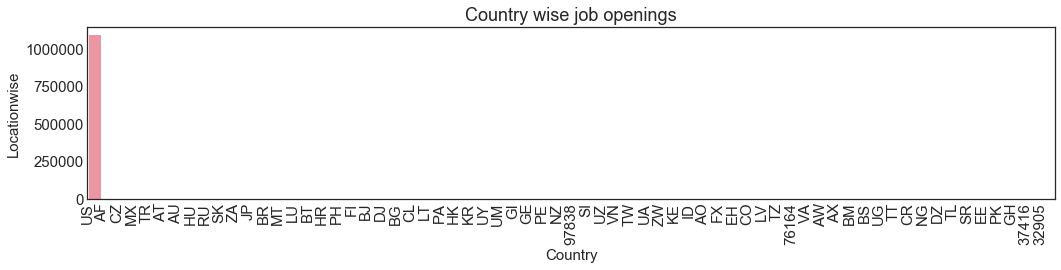

In [15]:
plt.rc('font',size=15)
plt.figure(figsize=(15,4))
ax=sns.barplot(x='Country',y="Locationwise", data=Country_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Country wise job openings')
plt.tight_layout();

In [16]:
jobs_US = jobs[jobs['Country']=='US']
jobs_US[['City','State','Country']].head()

,City,State,Country
0,Washington,DC,US
1,Charlotte,NC,US
2,Winter Park,FL,US
3,Orlando,FL,US
4,Orlando,FL,US


In [17]:
jobs_US.groupby(['City','State','Country']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False).head()

,City,State,Country,Locationwise
6601,Houston,TX,US,19306
9835,New York,NY,US,18395
2651,Chicago,IL,US,17806
3475,Dallas,TX,US,13139
610,Atlanta,GA,US,12352


In [18]:
State_wise_job_US = jobs_US.groupby(['State']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False)
State_wise_job_US.head()

,State,Locationwise
5,CA,109630
48,TX,98071
10,FL,71024
16,IL,58743
38,NY,53998


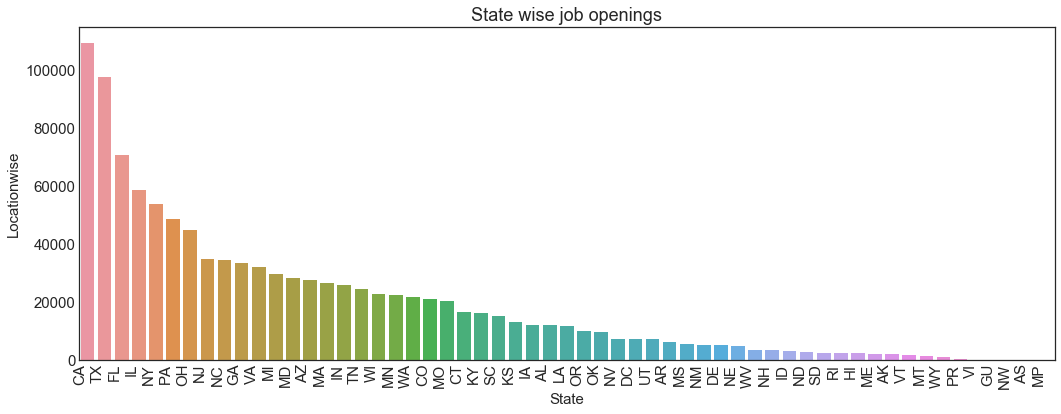

In [19]:
plt.rc('font',size=15)
plt.figure(figsize=(15,6))
ax=sns.barplot(x='State',y="Locationwise", data=State_wise_job_US)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('State wise job openings')
plt.tight_layout();

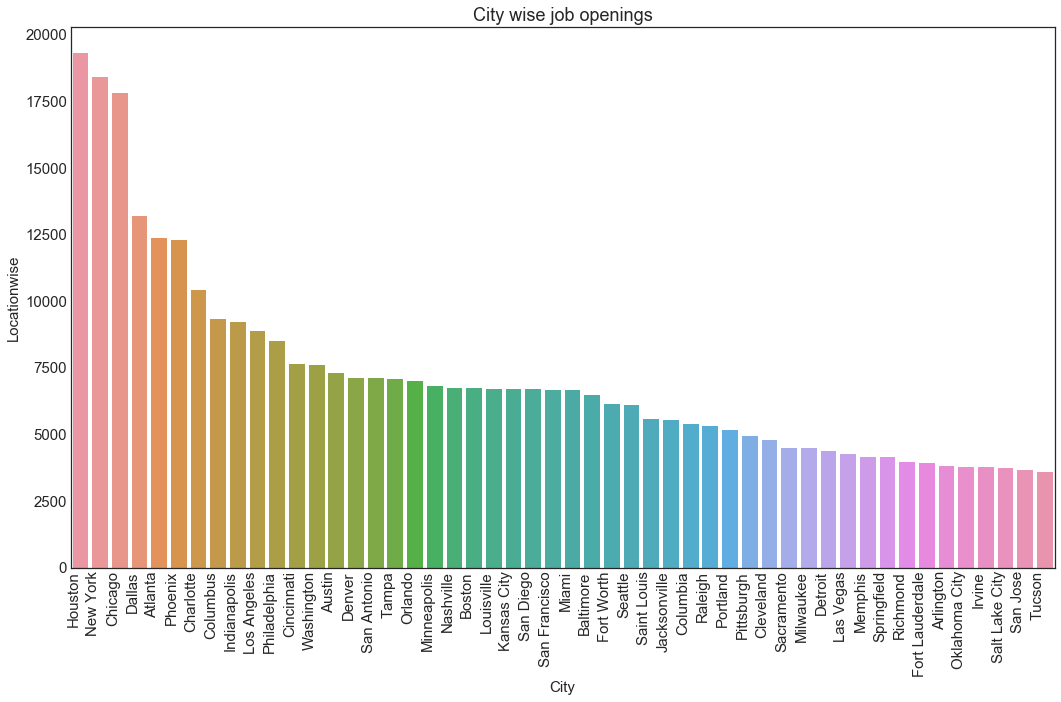

In [20]:
City_wise_job_US = jobs_US.groupby(['City']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False)
City_wise_job_US_cutoff = City_wise_job_US[City_wise_job_US['Locationwise']>=12]
plt.rc('font',size=15)
plt.figure(figsize=(15,10))
ax=sns.barplot(x='City',y="Locationwise", data=City_wise_job_US_cutoff.head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise job openings')
plt.tight_layout();

### Job Seekers - Supply

In [21]:
users_training.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False).head()

,Country,Locationwise
105,US,365740
47,IN,236
18,CA,108
81,PH,59
82,PK,59


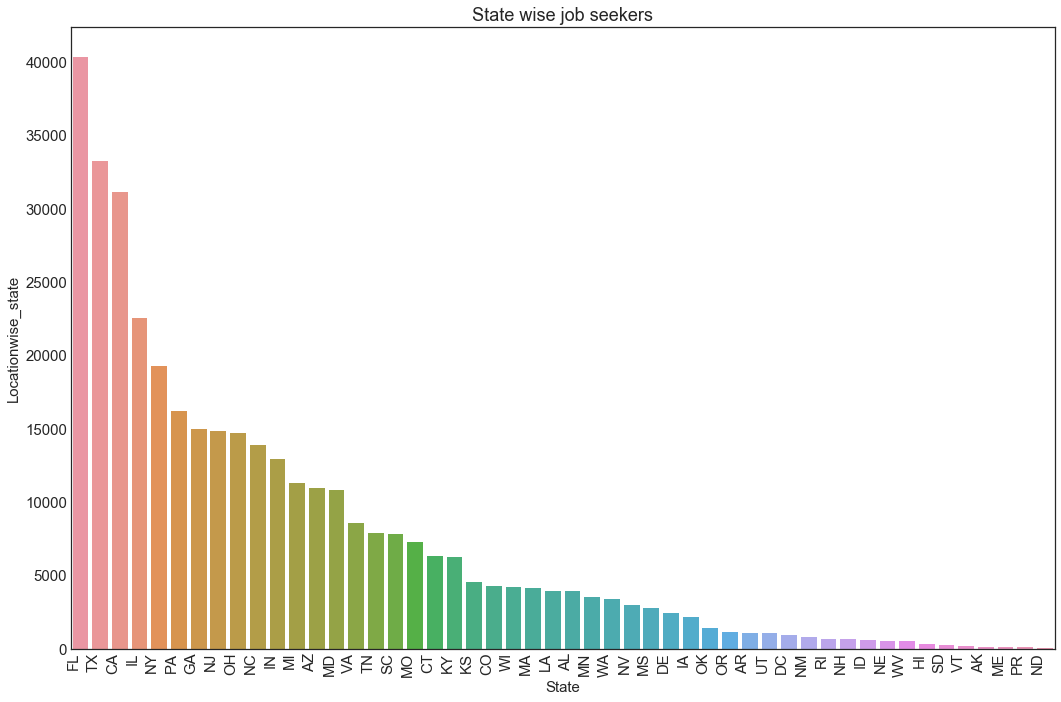

In [22]:
user_training_US = users_training[users_training['Country']=='US']
user_training_US_state_wise =user_training_US.groupby(['State']).size().reset_index(name='Locationwise_state').sort_values('Locationwise_state',ascending=False)
user_training_US_cutoff = user_training_US_state_wise[user_training_US_state_wise['Locationwise_state']>=12]
plt.rc('font',size=15)
plt.figure(figsize=(15,10))
ax = sns.barplot(x="State", y="Locationwise_state",data=user_training_US_cutoff.head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('State wise job seekers')
plt.tight_layout();

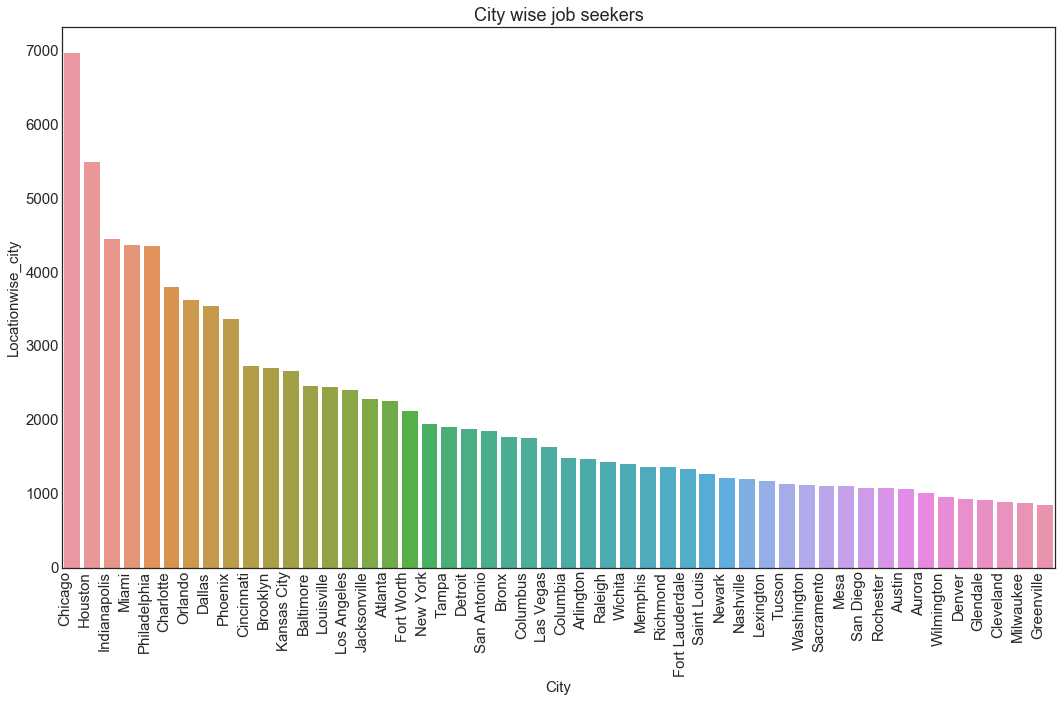

In [23]:
user_training_US_city_wise =user_training_US.groupby(['City']).size().reset_index(name='Locationwise_city').sort_values('Locationwise_city',ascending=False)
user_training_US__city_wise_cutoff = user_training_US_city_wise[user_training_US_city_wise['Locationwise_city']>=12]
plt.rc('font',size=15)
plt.figure(figsize=(15,10))
ax = sns.barplot(x="City", y="Locationwise_city",data=user_training_US__city_wise_cutoff.head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise job seekers')
plt.tight_layout();

### Collaborative filtering

__Flow__
- Find similar users
- Find for which jobs they have applied
- Recommend those job to the other users who shared similar user profile.

Let's collate user profiles based on their degree type, majors and total years of experience.

In [24]:
user_training_US = user_training_US.iloc[:10000,:]
user_training_US.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [25]:
user_training_US = user_training_US.iloc[:10000,:]
user_training_US ['DegreeType'] = user_training_US['DegreeType'].fillna('')
user_training_US['Major'] = user_training_US['Major'].fillna('')
user_training_US['TotalYearsExperience'] = str(user_training_US['TotalYearsExperience'].fillna(''))

In [26]:
user_training_US['DegreeType'] = user_training_US['DegreeType'] + user_training_US['Major'] +user_training_US['TotalYearsExperience']
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(user_training_US['DegreeType'])

In [27]:
tfidf_matrix.shape

(10000, 13720)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
user_training_US = user_training_US.reset_index()

In [ ]:
user_training_US.head() 

In [ ]:
userid = user_training_US['UserID']
indices = pd.Series(user_training_US.index, index=user_training_US['UserID'])
def get_recommendations_userwise(userid):
    idx = indices[userid]
    #print (idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_indices = [i[0] for i in sim_scores]
    #print (user_indices)
    return user_indices[0:11]

In [ ]:
def get_job_id(usrid_list):
    jobs_userwise = apps_training['UserID'].isin(usrid_list) #
    df1 = pd.DataFrame(data = apps_training[jobs_userwise], columns=['JobID'])
    joblist = df1['JobID'].tolist()
    Job_list = jobs['JobID'].isin(joblist) #[1083186, 516837, 507614, 754917, 686406, 1058896, 335132])
    df_temp = pd.DataFrame(data = jobs[Job_list], columns=['JobID','Title','Description','City','State'])
    return df_temp

In [ ]:
print ("-----Top 10 Similar users with userId:72------")
print (get_recommendations_userwise(72))
get_job_id(get_recommendations_userwise(72))